In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sal = pd.read_csv('Salaries.csv')
salariesData = pd.DataFrame(sal)
salariesData.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
salariesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


## Looking at the cell above there are: 
- 13 columns.
- 148654 rows.
- Notes & Status columns being fully null.
- BasePay has 609 null values.
- OvertimePay has 4 null values.
- OtherPay has 4 null values.
- Benefits has 36,163 null values.
- the rest have no null values and each column data type is shown above too.

In [4]:
print(salariesData['TotalPayBenefits'].describe()
,salariesData['TotalPayBenefits'].median()
,salariesData['TotalPayBenefits'].mode())

count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64 92404.09 0    7959.18
Name: TotalPayBenefits, dtype: float64


In [23]:
# min value is negative, absolute function should be used to clean these kind of values
salariesData['TotalPayBenefits'] = salariesData['TotalPayBenefits'].abs()
print(salariesData['TotalPayBenefits'].describe()
,salariesData['TotalPayBenefits'].median()
,salariesData['TotalPayBenefits'].mode())

count    148654.000000
mean      93692.563730
std       62793.520175
min           0.000000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64 92404.09 0    7959.18
Name: TotalPayBenefits, dtype: float64


- mean = 93692.554811
- std = 62793.520175
- min = 0.000000
- max = 567595.430000
- median = 92404.09
- mode = 7959.18
- Range = `max - min = 567595.430000 - 0.000000 = 567595.430000`

## Handling missing values :
- Handling missing values can be really hard sometimes but in the case of the Salaries dataset we can do little math to find null values
- Notes & Status columns can not be filled because there is no infos. about them.
- Duplicates & negative values should be handled first before filling null values.

In [6]:
salariesData.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
148649    False
148650    False
148651    False
148652    False
148653    False
Length: 148654, dtype: bool

There are no duplicates above but we will drop them anyways just in case there were any that we've missed

In [7]:
salariesData = salariesData.drop_duplicates()
salariesData['BasePay'] = salariesData['BasePay'].abs()
salariesData['OtherPay'] = salariesData['OtherPay'].abs()
salariesData['OvertimePay'] = salariesData['OvertimePay'].abs()
salariesData['TotalPay'] = salariesData['TotalPay'].abs()
salariesData['Benefits'] = salariesData['Benefits'].abs()
salariesData['TotalPayBenefits'] = salariesData['TotalPayBenefits'].abs()

# Let's fill up the nulls

- Firstly We can see that TotalPay & TotalPayBenefits has no null values thus we can easily find Benefits column null values by subtracting the previous two columns.
- Secondly we should fill out the OvertimePay & OtherPay columns.
- Finally we fill out the BasePay column by subtracting TotalPay from OtherPay and OvertimePay

In [9]:
salariesData['Benefits'] = salariesData['TotalPayBenefits'] - salariesData['TotalPay']

In [10]:
salariesData[salariesData['OtherPay'].isna() == 1]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN


In [11]:
salariesData[salariesData['OvertimePay'].isna() == 1]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148646,148647,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,0.0,0.0,0.0,2014,NaN,San Francisco,NaN


In [12]:
salariesData['OvertimePay'] = salariesData['OvertimePay'].fillna(0)
salariesData['OtherPay'] = salariesData['OtherPay'].fillna(0)

In [13]:
salariesData['BasePay'] = salariesData['TotalPay'] - salariesData['OvertimePay'] - salariesData['OtherPay']
salariesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 15.9+ MB


# Discussion : What happened? and what should we do next?.
- Applied absloute function for each column with numeric values that shouldn't be negative.
- Dropped duplicates.
- Found the null values as discussed earlier.
- OvertimePay & OtherPay nulls were filled as zero after considering the TotalPay columns values which were zeros also.
- Visulizing the data that interest us the most is the next step.

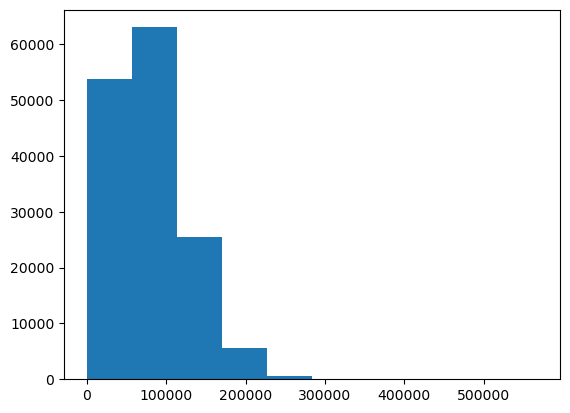

In [14]:
plt.hist(salariesData['TotalPay'])
plt.show()

### The most frequent value for TotalPayBenefits is 100,000$

In [17]:
a = salariesData[salariesData['JobTitle'].str.contains('POLICE', case=False, na=False)]
b = salariesData[salariesData['JobTitle'].str.contains('FIRE', case=False, na=False)]
c = salariesData[salariesData['JobTitle'].str.contains('CIVIL', case=False, na=False)]
POLICE = len(a) 
FIRE = len(b) 
CIVIL = len(c)
tot = len(salariesData)
others = tot-POLICE-FIRE-CIVIL

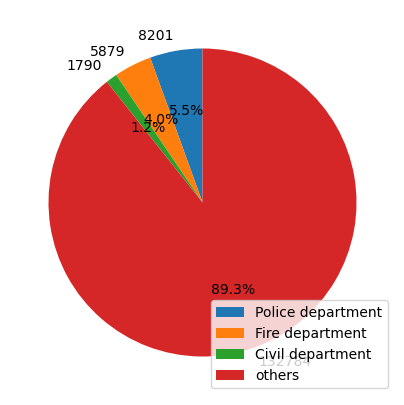

In [18]:
d = np.array([POLICE,FIRE,CIVIL,others])
e = d/tot
plt.figure(figsize=(5, 5))
plt.pie(e, labels = d,autopct='%1.1f%%', startangle=90)
plt.legend(['Police department','Fire department','Civil department','others'],loc = 'lower right')
plt.show()

In [19]:
# Summerizing statistics for Police department
a.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,8201.000000,8.201000e+03,8201.000000,8201.000000,8201.000000,8201.000000,8201.000000,8201.000000,0.0,0.0
mean,59510.154981,9.977781e+04,11976.923273,9254.430707,21722.039422,121009.165146,142731.204568,2012.385197,NaN,NaN
std,44409.752410,3.258509e+04,13827.632234,13457.632570,16612.911575,42257.512866,49449.151037,1.145945,NaN,NaN
min,2.000000,-4.547474e-13,0.000000,0.000000,0.000000,0.000000,2.730000,2011.000000,NaN,NaN
25%,7885.000000,9.134463e+04,2928.490000,2894.880000,0.000000,105712.170000,115698.320000,2011.000000,NaN,NaN
50%,54887.000000,1.124011e+05,7586.590000,5922.060000,31609.760000,129324.590000,154018.150000,2012.000000,NaN,NaN
75%,99301.000000,1.188980e+05,15782.230000,10595.310000,36480.590000,145068.640000,175437.500000,2013.000000,NaN,NaN
max,148562.000000,3.192750e+05,245131.880000,152037.570000,91302.460000,538909.280000,538909.280000,2014.000000,NaN,NaN


In [20]:
# Summerizing statistics for Fire department
b.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,5879.000000,5.879000e+03,5879.000000,5879.000000,5879.000000,5879.000000,5879.000000,5879.000000,0.0,0.0
mean,60734.931791,1.095988e+05,26365.376705,15721.675498,28948.448195,151685.812380,180634.260575,2012.514203,NaN,NaN
std,42523.603941,3.273898e+04,25454.182977,11404.597324,19014.313476,51324.653192,62000.974062,1.122670,NaN,NaN
min,5.000000,-1.455192e-11,0.000000,0.000000,0.000000,0.000000,5.800000,2011.000000,NaN,NaN
25%,36184.000000,1.059346e+05,5432.305000,10434.460000,0.000000,130221.440000,145473.695000,2012.000000,NaN,NaN
50%,72989.000000,1.119958e+05,19131.140000,15913.560000,38787.110000,153736.650000,185303.730000,2013.000000,NaN,NaN
75%,110645.000000,1.269681e+05,40783.050000,18781.325000,42769.910000,181512.840000,218831.260000,2014.000000,NaN,NaN
max,148555.000000,3.136860e+05,220909.480000,182234.590000,91201.660000,362844.660000,422353.400000,2014.000000,NaN,NaN


In [21]:
# Summerizing statistics for Cival department
c.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,0.0,0.0
mean,58929.840782,135716.820385,9.476385,2697.186196,30424.065743,138423.482966,168847.548709,2012.429609,NaN,NaN
std,42792.309297,49135.213748,320.321817,8555.228686,22696.849253,48673.366315,63835.017855,1.144318,NaN,NaN
min,139.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.480000,2011.000000,NaN,NaN
25%,17187.250000,107431.885000,0.000000,312.500000,0.000000,110382.820000,136615.572500,2011.000000,NaN,NaN
50%,51985.500000,155035.400000,0.000000,1249.500000,39712.100000,156410.880000,172612.350000,2012.000000,NaN,NaN
75%,102509.250000,176856.180000,0.000000,3124.940000,50613.845000,178458.490000,226594.522500,2013.000000,NaN,NaN
max,148624.000000,215666.520000,13327.320000,206752.000000,64406.220000,224998.620000,279519.640000,2014.000000,NaN,NaN


## Average salaries for each department (based on the TotalPayBenefits column)
- Police department = 142731.20
- Fire department = 180634.26
- Civil department = 168847.54

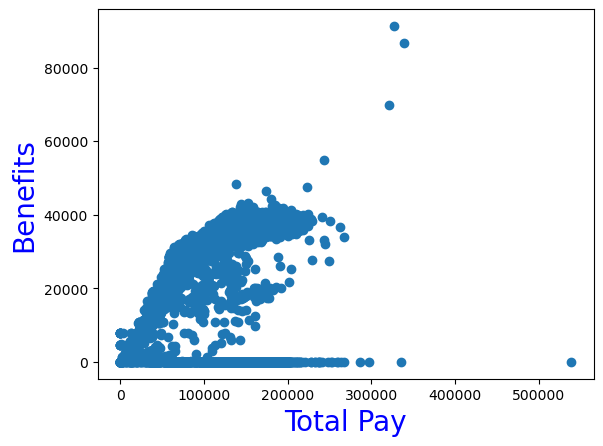

In [22]:
o = a['TotalPay']
p = a['Benefits']
plt.scatter(o,p)
plt.xlabel("Total Pay", color = 'b', size = 20)
plt.ylabel("Benefits", color = 'b', size = 20)
plt.show()

## Analysis
- This correlation might seem strongly positive at first glance `but is it actually positive?`.
- Total pay increases depending on factors that does not really affect the benefits that is why we see a lot of points which take a zero y-axis(benefits) value and have higher values for Total pay.
- In conclusion we need to think before making any assumption about the correlation that we make.